In [1]:
#%matplotlib inline
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"


In [2]:
# Read the City and Ride Data

city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

In [3]:
# Combine the data into a single dataset
ride_data_complete = pd.merge(city_data, ride_data, how="left", on=["city", "city"])
ride_data_complete.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [4]:
#Get data for the Scatter Plot

Urban_TR_X    =  ride_data_complete[ride_data_complete["type"] == "Urban"].groupby("city").count()["fare"]
Suburban_TR_X =  ride_data_complete[ride_data_complete["type"] == "Suburban"].groupby("city").count()["fare"]
Rural_TR_X =  ride_data_complete[ride_data_complete["type"] == "Rural"].groupby("city").count()["fare"]


Urban_AF_Y = ride_data_complete[ride_data_complete["type"] == "Urban"].groupby("city").mean()["fare"]
Suburban_AF_Y  = ride_data_complete[ride_data_complete["type"] == "Suburban"].groupby("city").mean()["fare"]
Rural_AF_Y  = ride_data_complete[ride_data_complete["type"] == "Rural"].groupby("city").mean()["fare"]


Urban_TD  = city_data[city_data["type"] == "Urban"].groupby("city").sum()["driver_count"]
Suburban_TD  = city_data[city_data["type"] == "Suburban"].groupby("city").sum()["driver_count"]
Rural_TD  = city_data[city_data["type"] == "Rural"].groupby("city").sum()["driver_count"]



## Bubble Plot of Ride Sharing Data

In [2]:

# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


<IPython.core.display.Javascript object>


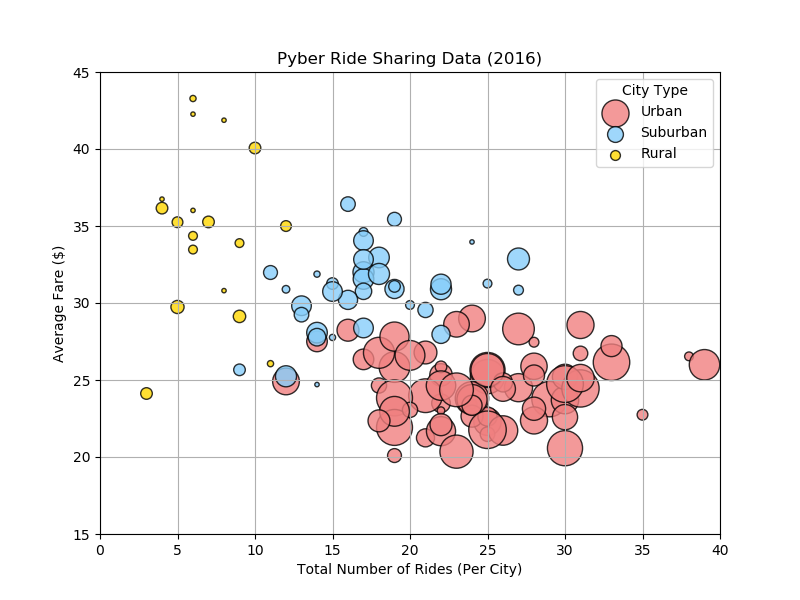

In [5]:
# Build the scatter plots for each city types

plt.figure(figsize=(8,6))
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.ylim(15,45)
plt.xlim(0, 40)

plt.scatter(Urban_TR_X, Urban_AF_Y, s = 10*Urban_TD, c="lightcoral", edgecolors="black", linewidths=1,
            marker="o", alpha=0.8, label="Urban")
plt.scatter(Suburban_TR_X, Suburban_AF_Y, s = 10*Suburban_TD, c="lightskyblue", edgecolors="black", linewidths=1,
            marker="o", alpha=0.8, label="Suburban")
plt.scatter(Rural_TR_X, Rural_AF_Y, s = 10*Rural_TD, c="gold", edgecolors="black", linewidths=1,
            marker="o", alpha=0.8, label="Rural")


plt.legend(title="City Type")
#plt.text(42, 15, "Note : Circle Size Corelates to driver count per city")
plt.grid(True)
plt.show()

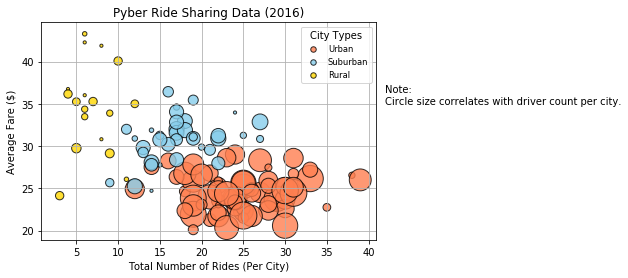

In [3]:
# Show plot Provided
plt.show()

In [ ]:
# Save Figure
plt.savefig('matplotlib_bubble.png')

## Total Fares by City Type

In [8]:
city_types_df = ride_data_complete["type"].unique()
city_types_df[0] = "Rural"
city_types_df[1] = "Suburban"
city_types_df[2] = "Urban"
city_types_df

array(['Rural', 'Suburban', 'Urban'], dtype=object)

<IPython.core.display.Javascript object>


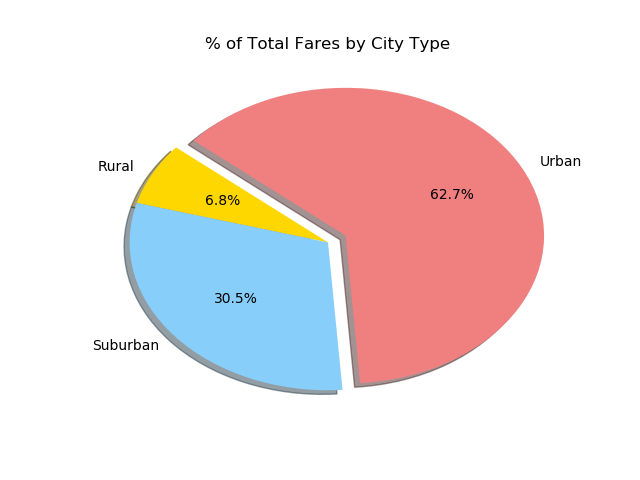

In [9]:
# Build Pie Chart fo Average Fares

total_fares   = ride_data_complete["fare"].sum()
fare_data_df = pd.DataFrame({"Average Fare": ride_data_complete.groupby("type").sum()["fare"]})

colors = ("gold", "lightskyblue", "lightcoral")

plt.pie(
          ((fare_data_df['Average Fare'] / total_fares ) * 100),
            labels=city_types_df,
            shadow=True,
            colors=colors,
            explode=(0,0,0.1),
            startangle=140,
            autopct='%1.1f%%'
            )

plt.title("% of Total Fares by City Type")
plt.show()

# Save Figure
plt.savefig('matplotlib_Fares.png')

In [ ]:
# Show Figure (Provided)
plt.show()

## Total Rides by City Type

<IPython.core.display.Javascript object>


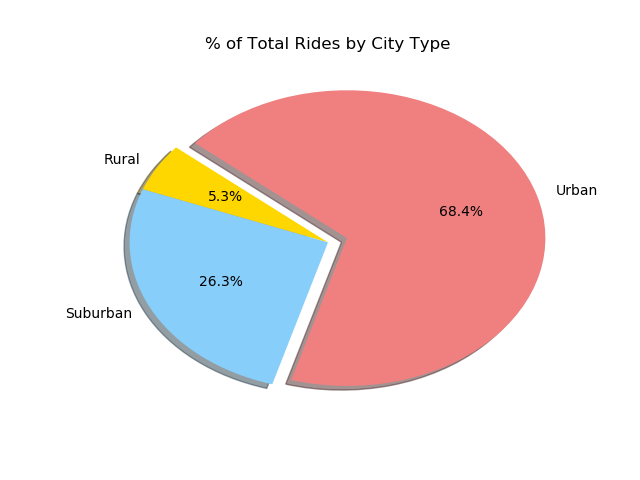

In [10]:
# Calculate Ride Percents &  Build Pie Chart

total_rides   = ride_data_complete["city"].count()
ride_data_df = pd.DataFrame({"Total Rides": ride_data_complete.groupby("type").count()["city"] })                  

colors = ("gold", "lightskyblue", "lightcoral")

plt.pie(
        ((ride_data_df['Total Rides'] / total_rides ) * 100),
        labels=city_types_df,
        shadow=True,
        colors=colors,
        explode=(0,0,0.1),
        startangle=140,
        autopct='%1.1f%%'
        )

plt.title("% of Total Rides by City Type")
plt.show()

# Save Figure
plt.savefig('matplotlib_rides.png')


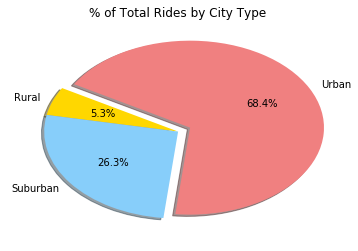

In [5]:
# Show Figure ( Provided)
plt.show()

## Total Drivers by City Type

<IPython.core.display.Javascript object>


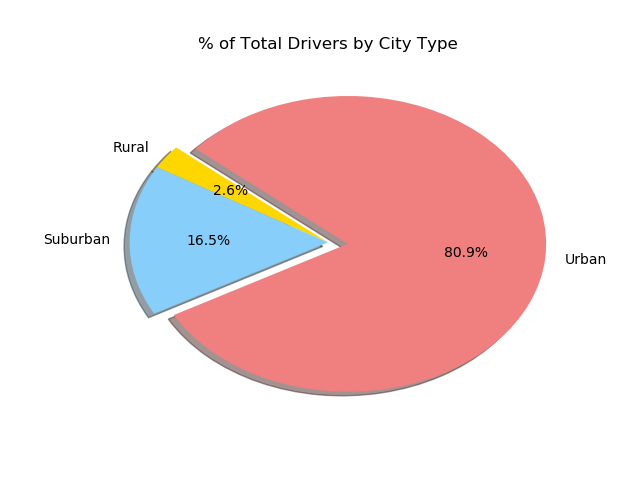

In [11]:
# Calculate Driver Percents and Build Pie Charts

total_drivers = city_data["driver_count"].sum()
driver_data_df = pd.DataFrame({"Total Drivers": city_data.groupby("type").sum()["driver_count"] })  

colors = ("gold", "lightskyblue", "lightcoral")

plt.pie(
        ((driver_data_df['Total Drivers'] / total_drivers ) * 100),
        labels=city_types_df,
        shadow=True,
        colors=colors,
        explode=(0,0,0.1),
        startangle=140,
        autopct='%1.1f%%'
        )

plt.title('% of Total Drivers by City Type')
plt.show()

# Save Figure
plt.savefig('matplotlib_drivers.png')


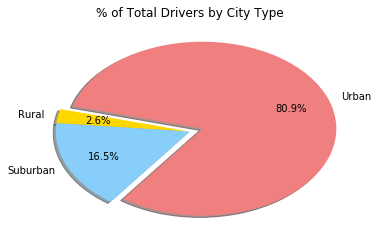

In [6]:
# Show Figure Provided
plt.show()